In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
%matplotlib inline

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd


In [3]:
import tensorflow as tf



In [4]:
np.random.seed(1337)  # for reproducibility
import tensorflow as tf
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Embedding, LSTM, Bidirectional, SimpleRNN, GRU
from tensorflow.keras.layers import Flatten
from tensorflow.keras.datasets import imdb


In [5]:
'''Train a Bidirectional LSTM on the IMDB sentiment classification task.
'''



max_features = 20000
maxlen = 100  # cut texts after this number of words (among top max_features most common words)

print('Loading data...')
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.imdb.load_data(num_words=max_features)
print(len(X_train), 'train sequences')
print(len(X_test), 'test sequences')

Loading data...
25000 train sequences
25000 test sequences


In [6]:
X_train[1]

[1,
 194,
 1153,
 194,
 8255,
 78,
 228,
 5,
 6,
 1463,
 4369,
 5012,
 134,
 26,
 4,
 715,
 8,
 118,
 1634,
 14,
 394,
 20,
 13,
 119,
 954,
 189,
 102,
 5,
 207,
 110,
 3103,
 21,
 14,
 69,
 188,
 8,
 30,
 23,
 7,
 4,
 249,
 126,
 93,
 4,
 114,
 9,
 2300,
 1523,
 5,
 647,
 4,
 116,
 9,
 35,
 8163,
 4,
 229,
 9,
 340,
 1322,
 4,
 118,
 9,
 4,
 130,
 4901,
 19,
 4,
 1002,
 5,
 89,
 29,
 952,
 46,
 37,
 4,
 455,
 9,
 45,
 43,
 38,
 1543,
 1905,
 398,
 4,
 1649,
 26,
 6853,
 5,
 163,
 11,
 3215,
 10156,
 4,
 1153,
 9,
 194,
 775,
 7,
 8255,
 11596,
 349,
 2637,
 148,
 605,
 15358,
 8003,
 15,
 123,
 125,
 68,
 2,
 6853,
 15,
 349,
 165,
 4362,
 98,
 5,
 4,
 228,
 9,
 43,
 2,
 1157,
 15,
 299,
 120,
 5,
 120,
 174,
 11,
 220,
 175,
 136,
 50,
 9,
 4373,
 228,
 8255,
 5,
 2,
 656,
 245,
 2350,
 5,
 4,
 9837,
 131,
 152,
 491,
 18,
 2,
 32,
 7464,
 1212,
 14,
 9,
 6,
 371,
 78,
 22,
 625,
 64,
 1382,
 9,
 8,
 168,
 145,
 23,
 4,
 1690,
 15,
 16,
 4,
 1355,
 5,
 28,
 6,
 52,
 154,
 462,
 33,


In [7]:


print('X_train shape(before pad_sequences): ', X_train.shape)
print('X_test shape(before pad_sequences): ', X_train.shape)

print("Pad sequences (samples x time)")
X_train = tf.keras.preprocessing.sequence.pad_sequences(X_train, maxlen=maxlen)
X_test = tf.keras.preprocessing.sequence.pad_sequences(X_test, maxlen=maxlen)
print('X_train shape:', X_train.shape)
print('X_test shape:', X_test.shape)

y_train = np.array(y_train)
y_test = np.array(y_test)

X_train shape(before pad_sequences):  (25000,)
X_test shape(before pad_sequences):  (25000,)
Pad sequences (samples x time)
X_train shape: (25000, 100)
X_test shape: (25000, 100)


In [8]:
layers = 128
dropout = 0.2
epochs = 3
batch_size = 128

# LSTM

In [9]:
tf.keras.layers.Embedding

keras.layers.embeddings.Embedding

In [10]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Embedding(max_features, 128, input_length=maxlen))
model.add(tf.keras.layers.LSTM(layers))
model.add(tf.keras.layers.Dropout(dropout))
model.add(tf.keras.layers.Dense(1, activation='sigmoid'))

model.compile('adam', 'binary_crossentropy', metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 100, 128)          2560000   
_________________________________________________________________
lstm (LSTM)                  (None, 128)               131584    
_________________________________________________________________
dropout (Dropout)            (None, 128)               0         
_________________________________________________________________
dense (Dense)                (None, 1)                 129       
Total params: 2,691,713
Trainable params: 2,691,713
Non-trainable params: 0
_________________________________________________________________


In [12]:
history = model.fit(X_train, y_train,
                    epochs=epochs,
                    batch_size=batch_size,
                    validation_split=0.2)

Epoch 1/3
157/157 [==============================] - 21s 125ms/step - loss: 0.4543 - accuracy: 0.7779 - val_loss: 0.4236 - val_accuracy: 0.8182
Epoch 2/3
157/157 [==============================] - 19s 124ms/step - loss: 0.2316 - accuracy: 0.9109 - val_loss: 0.3836 - val_accuracy: 0.8386
Epoch 3/3
157/157 [==============================] - 21s 134ms/step - loss: 0.1441 - accuracy: 0.9495 - val_loss: 0.3928 - val_accuracy: 0.8256


In [11]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']





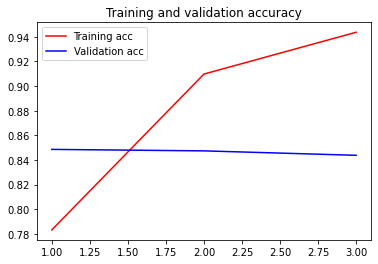

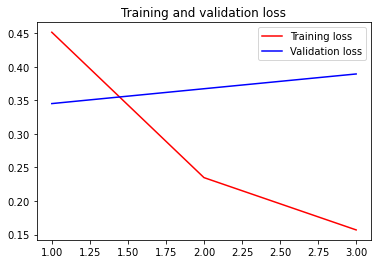

In [12]:
import matplotlib.pyplot as plt

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'b', label='Training acc',color="red")
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'b', label='Training loss',color="red")
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()


In [13]:
score = model.evaluate(X_test, y_test)
score[1]

782/782 [==============================] - 12s 16ms/step - loss: 0.3993 - accuracy: 0.8376


0.8376399874687195

# BLSTM

In [35]:
model = Sequential()
model.add(Embedding(max_features, 128, input_length=maxlen))
model.add(Bidirectional(LSTM(layers)))
model.add(Dropout(dropout))
model.add(Dense(1, activation='sigmoid'))

model.compile('adam', 'binary_crossentropy', metrics=['accuracy'])

model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 100, 128)          2560000   
_________________________________________________________________
bidirectional_1 (Bidirection (None, 256)               263168    
_________________________________________________________________
dropout_2 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 257       
Total params: 2,823,425
Trainable params: 2,823,425
Non-trainable params: 0
_________________________________________________________________


In [36]:
history = model.fit(X_train, y_train,
                    epochs=epochs,
                    batch_size=batch_size,
                    validation_split=0.2)

Epoch 1/3
157/157 [==============================] - 62s 378ms/step - loss: 0.4593 - accuracy: 0.7792 - val_loss: 0.3471 - val_accuracy: 0.8482
Epoch 2/3
157/157 [==============================] - 67s 424ms/step - loss: 0.2456 - accuracy: 0.9044 - val_loss: 0.3429 - val_accuracy: 0.8540
Epoch 3/3
157/157 [==============================] - 60s 381ms/step - loss: 0.1622 - accuracy: 0.9428 - val_loss: 0.4218 - val_accuracy: 0.8424


In [10]:
score = model.evaluate(X_test, y_test)
score[1]

25000/25000 [==============================] - 22s 886us/step


0.81904

# SimpleRNN

In [11]:
model = Sequential()
model.add(Embedding(max_features, 128, input_length=maxlen))
model.add(SimpleRNN(layers)) 
model.add(Dropout(dropout))
model.add(Dense(1, activation='sigmoid'))

model.compile('adam', 'binary_crossentropy', metrics=['accuracy'])

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, 100, 128)          2560000   
_________________________________________________________________
simple_rnn_1 (SimpleRNN)     (None, 128)               32896     
_________________________________________________________________
dropout_3 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 129       
Total params: 2,593,025
Trainable params: 2,593,025
Non-trainable params: 0
_________________________________________________________________


In [12]:
history = model.fit(X_train, y_train,
                    epochs=epochs,
                    batch_size=batch_size,
                    validation_split=0.2)

Train on 20000 samples, validate on 5000 samples
Epoch 1/3
20000/20000 [==============================] - 19s 927us/step - loss: 0.6278 - acc: 0.6275 - val_loss: 0.5543 - val_acc: 0.7054
Epoch 2/3
20000/20000 [==============================] - 17s 867us/step - loss: 0.3938 - acc: 0.8298 - val_loss: 0.4116 - val_acc: 0.8196
Epoch 3/3
20000/20000 [==============================] - 17s 861us/step - loss: 0.2647 - acc: 0.8973 - val_loss: 0.4564 - val_acc: 0.8054


In [37]:
score = model.evaluate(X_test, y_test)
score[1]

782/782 [==============================] - 34s 43ms/step - loss: 0.4354 - accuracy: 0.8373


0.8372799754142761

# GRU

In [14]:
model = Sequential()
model.add(Embedding(max_features, 128, input_length=maxlen))
model.add(GRU(layers)) 
model.add(Dropout(dropout))
model.add(Dense(1, activation='sigmoid'))

model.compile('adam', 'binary_crossentropy', metrics=['accuracy'])

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_4 (Embedding)      (None, 100, 128)          2560000   
_________________________________________________________________
gru_1 (GRU)                  (None, 128)               98688     
_________________________________________________________________
dropout_4 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 129       
Total params: 2,658,817
Trainable params: 2,658,817
Non-trainable params: 0
_________________________________________________________________


In [15]:
history = model.fit(X_train, y_train,
                    epochs=epochs,
                    batch_size=batch_size,
                    validation_split=0.2)

Train on 20000 samples, validate on 5000 samples
Epoch 1/3
20000/20000 [==============================] - 33s 2ms/step - loss: 0.4960 - acc: 0.7460 - val_loss: 0.4931 - val_acc: 0.8098
Epoch 2/3
20000/20000 [==============================] - 32s 2ms/step - loss: 0.2559 - acc: 0.8975 - val_loss: 0.4102 - val_acc: 0.8364
Epoch 3/3
20000/20000 [==============================] - 32s 2ms/step - loss: 0.1587 - acc: 0.9434 - val_loss: 0.4368 - val_acc: 0.8366


In [16]:
score = model.evaluate(X_test, y_test)
score[1]

25000/25000 [==============================] - 15s 591us/step


0.8364

# Dense